In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation,Dense,Flatten,BatchNormalization,Conv2D,MaxPool2D,Dropout
from tensorflow.keras.optimizers import Adam
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from google.colab import files

In [ ]:
uploaded=files.upload()

Saving data.zip to data.zip


In [ ]:
!unzip data.zip
!rm data.zip

In [ ]:
batch_size = 8
epoch = 30

In [ ]:
directory = 'data'

train_datagen = ImageDataGenerator(validation_split=0.2,       
                                   rescale = 1./255,          
                                   rotation_range=40,           
                                   width_shift_range=0.2,     
                                   height_shift_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip=True,
                                   fill_mode='nearest')      

train_generator = train_datagen.flow_from_directory(
                                directory,
                                target_size = (70, 70),
                                batch_size = batch_size,
                                color_mode="rgb",              
                                class_mode = 'binary',
                                seed=2020,                      
                                subset = 'training')           
validation_generator = train_datagen.flow_from_directory(
                                directory,
                                target_size = (70, 70),
                                batch_size = batch_size,
                                color_mode="rgb",             
                                class_mode = 'binary',
                                subset = 'validation')         


Found 8011 images belonging to 2 classes.
Found 2002 images belonging to 2 classes.


In [ ]:
imgs, labels = next(train_generator)

In [ ]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1, batch_size, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

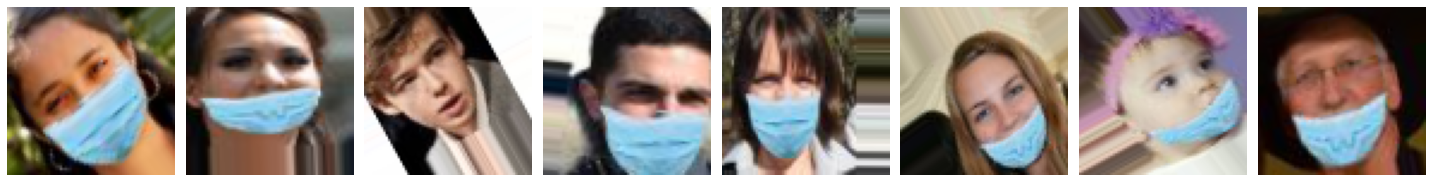

[0. 1. 1. 0. 0. 1. 1. 1.]


In [ ]:
plotImages(imgs);
print(labels);

In [ ]:
model = Sequential([
                    Conv2D(filters=32, kernel_size=(3,3),activation='relu',padding='same',input_shape=(70,70,3)),
                    MaxPool2D(pool_size=(2,2), strides=2),
                    Conv2D(filters=32, kernel_size=(3,3), activation='relu', padding= 'same'),
                    MaxPool2D(pool_size=(2,2), strides =2),
                    Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding= 'same'),
                    MaxPool2D(pool_size=(2,2), strides =2),
                    Flatten(),
                    Dense(units=64, activation= 'relu'),
                    #means the output is 0,1 (the labels) and the P(c=0) +P(c=1) = 1 
                    Dense(units=1, activation='sigmoid'), 

])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 70, 70, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 35, 35, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 35, 35, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 17, 17, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 17, 17, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 4096)              0

In [ ]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(train_generator ,epochs = epoch,validation_data= validation_generator)

Epoch 1/30
1002/1002 [==============================] - 19s 19ms/step - loss: 0.4378 - accuracy: 0.7853 - val_loss: 0.4144 - val_accuracy: 0.8172
Epoch 2/30
1002/1002 [==============================] - 19s 19ms/step - loss: 0.2760 - accuracy: 0.8878 - val_loss: 0.2984 - val_accuracy: 0.8751
Epoch 3/30
1002/1002 [==============================] - 19s 19ms/step - loss: 0.2337 - accuracy: 0.9073 - val_loss: 0.2910 - val_accuracy: 0.8736
Epoch 4/30
1002/1002 [==============================] - 19s 19ms/step - loss: 0.2067 - accuracy: 0.9234 - val_loss: 0.2905 - val_accuracy: 0.8776
Epoch 5/30
1002/1002 [==============================] - 19s 19ms/step - loss: 0.1782 - accuracy: 0.9337 - val_loss: 0.1917 - val_accuracy: 0.9261
Epoch 6/30
1002/1002 [==============================] - 19s 19ms/step - loss: 0.1651 - accuracy: 0.9397 - val_loss: 0.2092 - val_accuracy: 0.9171
Epoch 7/30
1002/1002 [==============================] - 19s 19ms/step - loss: 0.1510 - accuracy: 0.9422 - val_loss: 0.2133 -

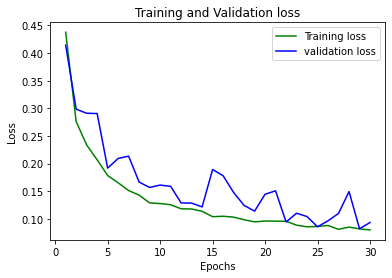

In [ ]:
loss_train = history.history['loss']
loss_val = history.history['val_loss']
epochstoplot = range(1,epoch+1)
plt.plot(epochstoplot, loss_train, 'g', label='Training loss')
plt.plot(epochstoplot, loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

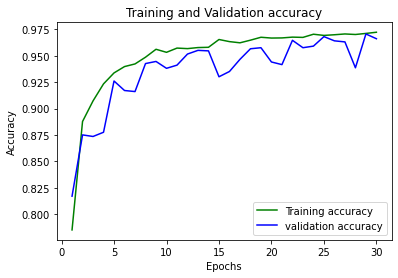

In [ ]:
accur_train = history.history['accuracy']
accur_val = history.history['val_accuracy']
plt.plot(epochstoplot, accur_train, 'g', label='Training accuracy')
plt.plot(epochstoplot, accur_val, 'b', label='validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
from IPython.display import Image, display
TGREEN =  '\033[1;37;42m'
TRED =    '\033[1;37;41m'

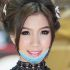



The person is not wearing a mask.



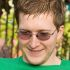



The person is not wearing a mask.



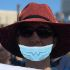



The person is not wearing a mask.



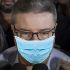



The person is wearing a mask. 



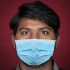



The person is wearing a mask. 



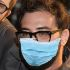



The person is wearing a mask. 



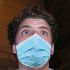



The person is wearing a mask. 



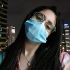



The person is wearing a mask. 



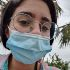



The person is wearing a mask. 



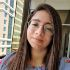



The person is not wearing a mask.



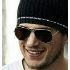



The person is not wearing a mask.



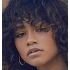



The person is not wearing a mask.



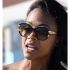



The person is not wearing a mask.



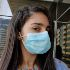



The person is wearing a mask. 



In [ ]:
for i in range (1,15):
  img_directory = str(i) + '.jpg'
  img_pred = image.load_img(img_directory, target_size = (70, 70))
  img_pred = image.img_to_array(img_pred)
  img_pred = np.expand_dims(img_pred, axis = 0)

  prediction = model.predict(img_pred)
  display(Image(img_directory,width= 150, height=150))
  print("\n")
  if(int(prediction[0][0]) == 0):
    print(TGREEN + "The person is wearing a mask. \n")
  else:
    print(TRED + "The person is not wearing a mask.\n")